## 1. Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage
import warnings

from dataset_utils import *
from preprocessing import load_patches, merge_patches, get_img_shapes
from preprocessing import merge_patches_and_save, merge_patches_and_save_all
from vis_utils import grid_vis_for_crop_and_merge

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [3]:
ICOSEG_SUBSET_80_PATH = '../datasets/icoseg/subset_80'

## 2. Load patches and merge (for 1 image)

real img_h, img_w: 334, 500
img_patches
(1, 1, 512, 512, 3) uint8 0 255 

mask_patches
(1, 1, 512, 512) uint8 0 255 

img_from_patches
(334, 500, 3) uint8 0 255
mask_from_patches
(334, 500) uint8 0 255


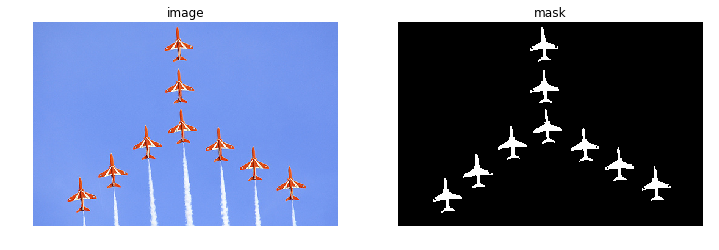

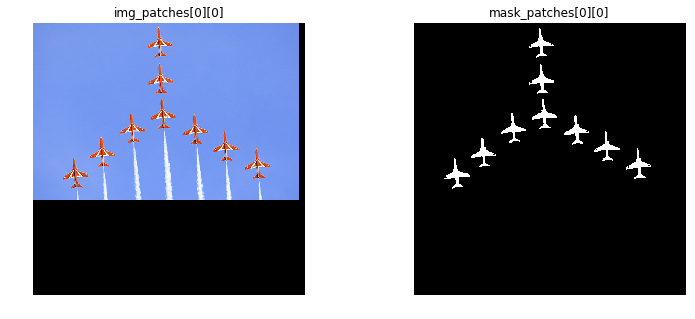

In [4]:
img_name = '2805945719_a77fcbd727'
img_patches_path = f'{ICOSEG_SUBSET_80_PATH}/val/val_img_patches'
mask_patches_path = f'{ICOSEG_SUBSET_80_PATH}/val/val_mask_patches'

img = skimage.io.imread(f'{ICOSEG_SUBSET_80_PATH}/images/{img_name}.jpg')
img_h, img_w = img.shape[:2]
print(f'real img_h, img_w: {img_h}, {img_w}')

# load_patches
img_patches = load_patches(img_name, img_patches_path)
print('img_patches')
print(img_patches.shape, img_patches.dtype,
      img_patches.min(), img_patches.max(), '\n')

mask_patches = load_patches(img_name, mask_patches_path)
print('mask_patches')
print(mask_patches.shape, mask_patches.dtype,
      mask_patches.min(), mask_patches.max(), '\n')

# merge_patches
img_from_patches = merge_patches(img_patches, img_h=img_h, img_w=img_w)
print('img_from_patches')
print(img_from_patches.shape, img_from_patches.dtype,
      img_from_patches.min(), img_from_patches.max())

mask_from_patches = merge_patches(mask_patches, img_h=img_h, img_w=img_w)
print('mask_from_patches')
print(mask_from_patches.shape, mask_from_patches.dtype,
      mask_from_patches.min(), mask_from_patches.max())

# grid_vis
grid_vis_for_crop_and_merge(img_from_patches, img_patches,
                            mask_from_patches, mask_patches)

## 3. Merge patches and save (for images from a dataset split)

In [5]:
_, _, val, val_img_names, _, _ = load_icoseg_subset_80_with_img_names()
val_images, val_masks = val
val_img_shapes = get_img_shapes(val_images)

img_patches_path = f'{ICOSEG_SUBSET_80_PATH}/val/val_img_patches'
img_save_path = f'{ICOSEG_SUBSET_80_PATH}/val/val_img_from_patches'

mask_patches_path = f'{ICOSEG_SUBSET_80_PATH}/val/val_mask_patches'
mask_save_path = f'{ICOSEG_SUBSET_80_PATH}/val/val_mask_from_patches'

merge_patches_and_save(val_img_shapes, val_img_names, img_patches_path,
                       img_save_path, img_format='png')
merge_patches_and_save(val_img_shapes, val_img_names, mask_patches_path,
                       mask_save_path, img_format='png')

## 4. Merge patches and save all (for all dataset splits)

In [6]:
%%time
merge_patches_and_save_all(load_icoseg_subset_80_with_img_names(),
                           dataset_path=ICOSEG_SUBSET_80_PATH,
                           img_format='png')

CPU times: user 7.62 s, sys: 44 ms, total: 7.67 s
Wall time: 7.83 s
